In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [161]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]


In [171]:
L=60
filename1 = '/Users/julianthoenniss/Documents/PhD/data/ent_entropy_Jx=0.31_Jy=0.0_g=0.7853981633974483_del_t=1_beta=1.0_L=' + str(60)




In [172]:
iterator = 11

times = []
time_step = 0
with h5py.File(filename1 + '.hdf5', 'r') as f:
    data_entr = f['temp_entr']
    times = data_entr[:,0]
    time_step = int(times[iterator])

max_time = int(max(times))
print('time step:', time_step)
print('maximal time:', max_time)

time step: 33
maximal time: 41


In [173]:
B = np.zeros((4*time_step,4*time_step), dtype=np.complex_)

with h5py.File(filename1 + '.hdf5', 'r') as f:
    data_IM = f['IM_exponent']
    
    B[:,:] = data_IM[iterator,:4*time_step,:4*time_step]



No handles with labels found to put in legend.


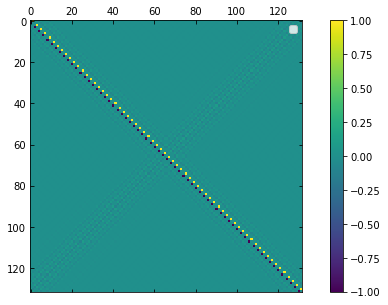

In [174]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 5]

im = ax.matshow(np.real(B))
fig.colorbar( im, orientation='vertical')
ax.yaxis.set_ticks_position('both')
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.legend(loc="upper right")

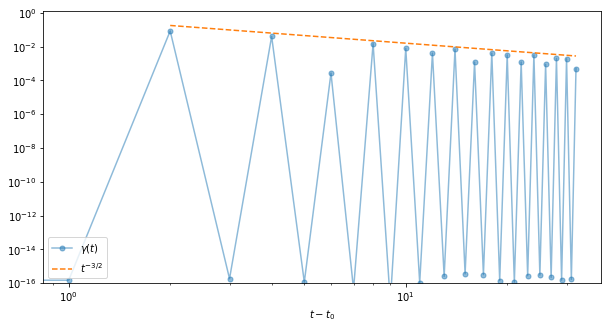

In [210]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 5]

ax.set_xlabel(r'$t-t_0$')

corr= []
for tau in range (2*time_step-1, -1, -2):
    corr.append(abs(B[tau,2*time_step-1]))



ax.set_ylim([1.e-16,1.2])
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot( np.arange(len(corr)), zero_to_nan(np.real(corr)), label=r'$\gamma(t)$', marker='o', alpha=.5, ms=5)
ax.plot(np.arange(2,len(corr)), 0.5 * np.arange(2,len(corr), dtype=float)**(-1.5), '--',label= r'$t^{-3/2}$')

ax.legend(loc="lower left")